<a href="https://colab.research.google.com/github/Ci-Daniels/qualia_diabetes_hack/blob/main/qualia_connect_diabetes_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay

from statistics import stdev

## Load the dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive->1 or negative ->0).

The data includes features such as :

-Age,

-Gender,

-Body mass index (BMI),

-Hypertension,

-Heart disease,

-Smoking history,

-HbA1c level,

-Blood glucose level.

This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.

Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [2]:
diab_set =pd.read_csv("/content/diabetes_prediction_dataset.csv")
diab_set.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diab_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#to get the unique features in the dataset
d = []
u = []
t = []
for col in diab_set:
    d.append(col)
    u.append(diab_set[col].nunique())
    t.append(diab_set[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,gender,object,3
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,6
5,bmi,float64,4247
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2


In [5]:
#see status of diabetes
#0 for negative
#1 for positive

diab_set["diabetes"].unique()

array([0, 1])

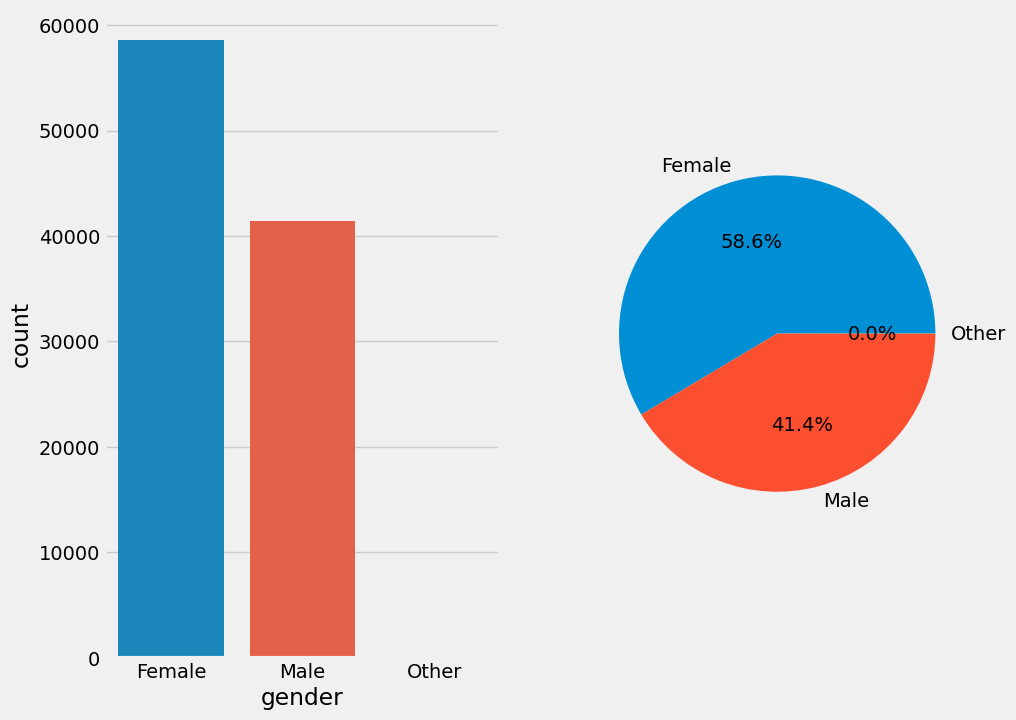

In [6]:
#plot how diabetes is affceting males and females from the dataset
labels = ['Female', 'Male', 'Other']
values = diab_set['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=diab_set['gender'], data=diab_set)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Relationship between diabetes Vs gender')
plt.show()

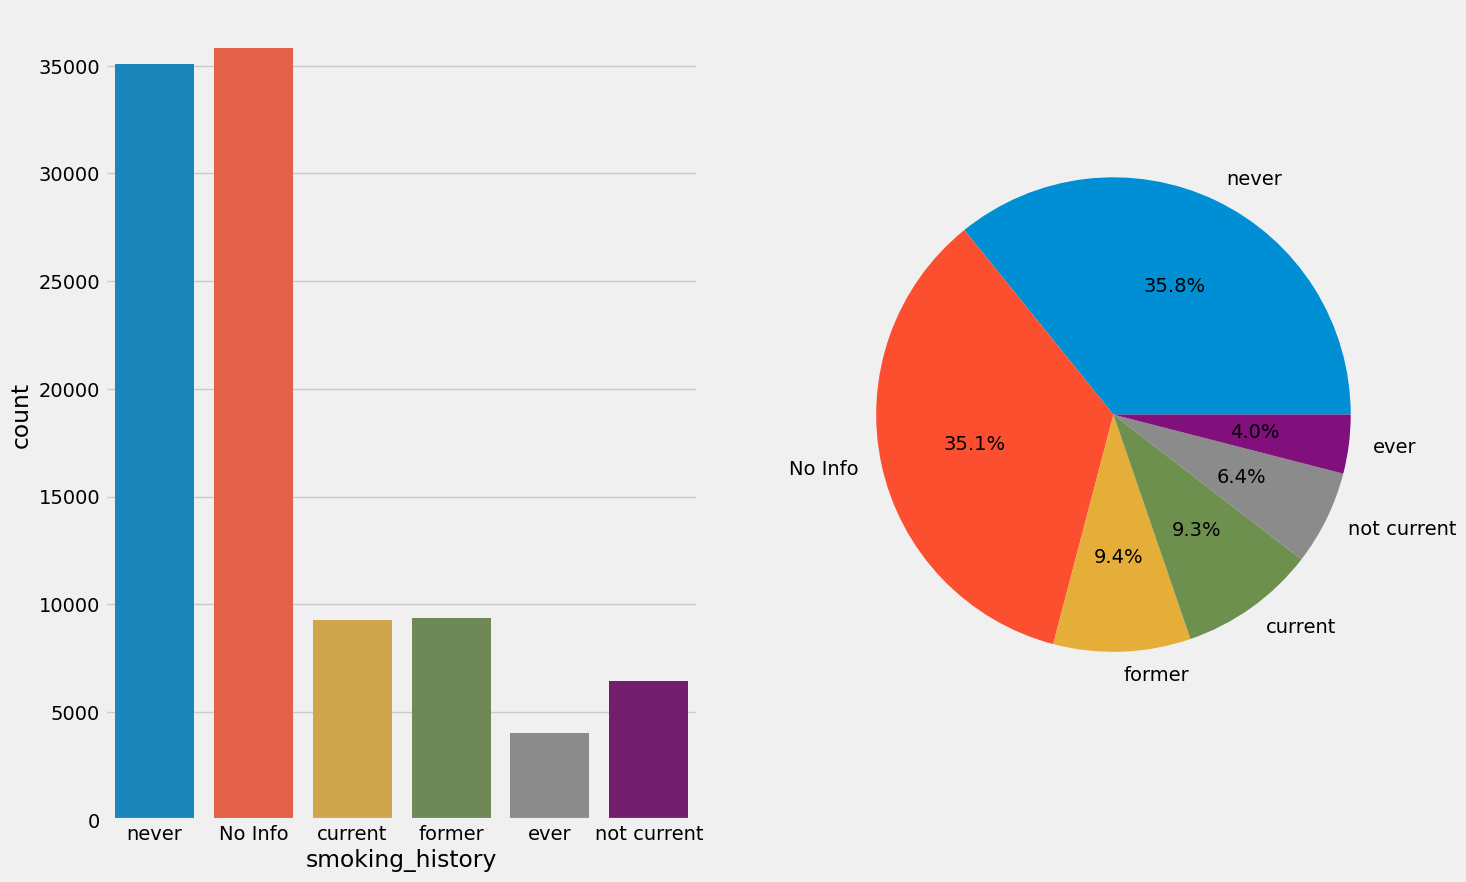

In [7]:
#how the rate of smoking affects diabtes occurrence
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = diab_set['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=diab_set['smoking_history'], data=diab_set)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Relationship betwee Diabetes and Smoking')
plt.show()

## Data Cleaning

In [8]:
#check which values are non in the dataset
diab_set.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
#check for duplicates and delete them
dup= diab_set.duplicated().sum()
print(dup)

#new shape of the data
data_sp = diab_set.shape
print(data_sp)



3854
(100000, 9)


In [10]:
#delete duplicates
diab_set_new = diab_set.drop_duplicates()



In [11]:
#new shape of the data
data_sp = diab_set.shape
print("Shape after drop:", data_sp)


Shape after drop: (100000, 9)


### Hot encod the categorical data to numerical data and replace them with
### Smoking History
'never': 4,

'No Info': 5,

'current': 6,

'former': 7,

'not current': 8,
                                
'ever': 9

---
### Gender

'Female': 2

'Male': 3


In [12]:
#Need to hot encode the categorical data(smoking history and gender) to numerical data so that we will be able to work on the datasets
diab_set['smoking_history'].replace({'never': 4, 'No Info': 5, 'current': 6, 'former': 7,
                                'not current': 8, 'ever': 9}, inplace=True)

diab_set['gender'].replace({'Female': 2, 'Male':3, 'Other':10}, inplace=True)

In [13]:
diab_set.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,4,25.19,6.6,140,0
1,2,54.0,0,0,5,27.32,6.6,80,0
2,3,28.0,0,0,4,27.32,5.7,158,0
3,2,36.0,0,0,6,23.45,5.0,155,0
4,3,76.0,1,1,6,20.14,4.8,155,0
5,2,20.0,0,0,4,27.32,6.6,85,0
6,2,44.0,0,0,4,19.31,6.5,200,1
7,2,79.0,0,0,5,23.86,5.7,85,0
8,3,42.0,0,0,4,33.64,4.8,145,0
9,2,32.0,0,0,4,27.32,5.0,100,0


### Correlation between features

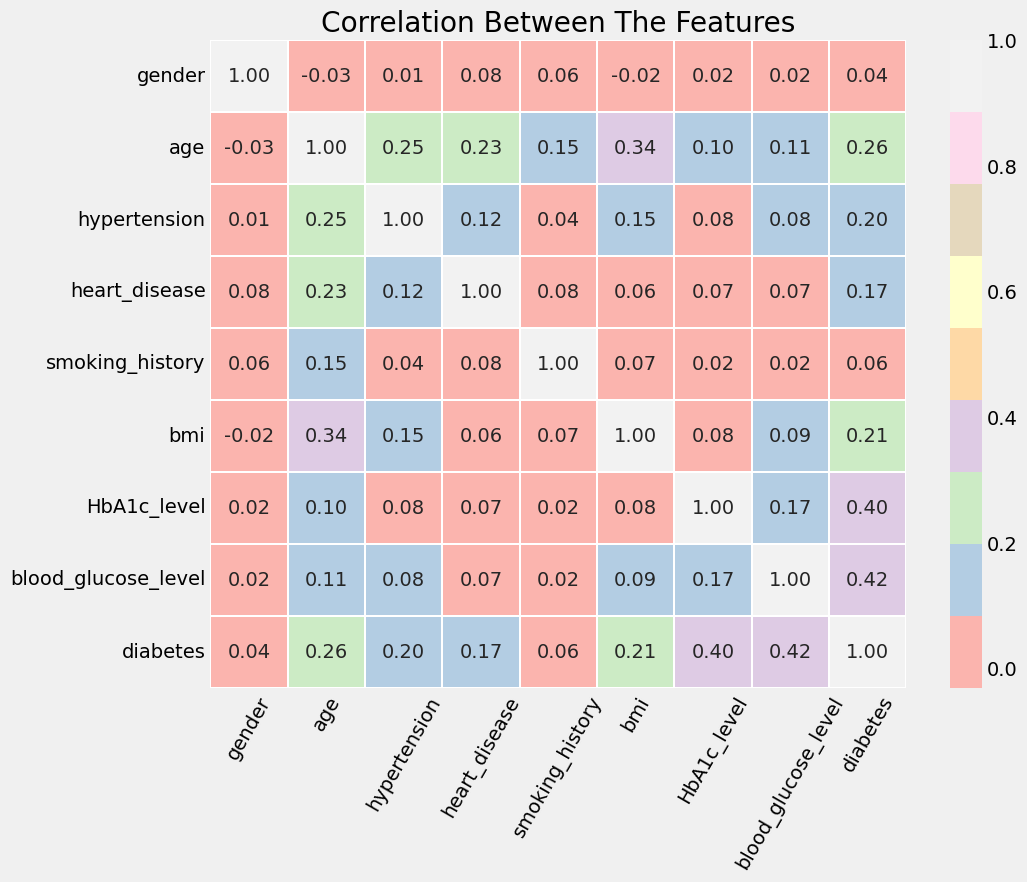

In [14]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(diab_set.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()



### Target Split

In [15]:
#split the target feature
diab_status = diab_set['diabetes']
diab_set.drop('diabetes', axis=1, inplace=True)
diab_set.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,2,80.0,0,1,4,25.19,6.6,140
1,2,54.0,0,0,5,27.32,6.6,80
2,3,28.0,0,0,4,27.32,5.7,158
3,2,36.0,0,0,6,23.45,5.0,155
4,3,76.0,1,1,6,20.14,4.8,155
5,2,20.0,0,0,4,27.32,6.6,85
6,2,44.0,0,0,4,19.31,6.5,200
7,2,79.0,0,0,5,23.86,5.7,85
8,3,42.0,0,0,4,33.64,4.8,145
9,2,32.0,0,0,4,27.32,5.0,100


## Split the dataset into training, validation and test sets

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(diab_set, diab_status, test_size=0.35, random_state=42)

### Feature scaling using Standard scaler and oversampler

In [17]:
# Scale the features using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

#convert back to pandas dataframe with be scaled
#using the mean and standard deviation computed during the training phase.
X_train = pd.DataFrame(xtrain_scaled)
X_test= pd.DataFrame(xtest_scaled)

#print y shape
print(ytest.shape)

#print x shape
print(X_test.shape)

(35000,)
(35000, 8)


## Models

1. KNN
2. SVM
3. Random Forest
4. Decision Tree

In [18]:
# calculate the accuracy, precision, f1-score
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result


## KNearestNeighbour classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
# let the model selct which parameters are the best for the model
KNN_model = KNeighborsClassifier()
param = {
    'n_neighbors': np.arange(1,20),
    'weights': ['uniform', 'distance'],
 }

gridSearch = GridSearchCV(KNN_model, param, cv=5, scoring='accuracy')
gridSearch.fit(X_train, ytrain)



In [ ]:
#model fit with the training sets
KNN_model = gridSearch.best_estimator_
KNN_model.fit(X_train, ytrain)

In [ ]:
y_predict = KNN_model.predict(X_test)

In [ ]:
#confusion matrix
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of KNN')
plt.grid()

In [ ]:
#print result
KNN_result = metrics_calculator(ytest, y_predict, 'KNN')
KNN_result

## SVM

In [ ]:
#import the support vector classifier
from sklearn.metrics.pairwise import linear_kernel
from sklearn.svm import SVC

#create the model and set classifier parameters
#svm_model = SVC(C=3, kernel ="linear","rbf", "sigmoid, " )
svm_model = SVC(C=3, kernel="linear")

#train the model using the training datasets
svm_model = svm_model.fit(X_train, ytrain)

In [ ]:
#predict
y_predict = svm_model.predict(X_test)


In [ ]:
#print result
SVM_result = metrics_calculator(ytest, y_predict, 'SVM')
SVM_result

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RAN_model = RandomForestClassifier()
parameter = {
    'criterion': ['gini', 'entropy']}

gridSearch = GridSearchCV(RAN_model, parameter, cv=5, scoring='accuracy')
gridSearch.fit(X_train, ytrain)

In [ ]:
RAN_model = gridSearch.best_estimator_
RAN_model.fit(X_train, ytrain)

In [ ]:
ypred = RAN_model.predict(X_test)

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=False)
score = cross_val_score(RAN_model, X_train, ytrain, cv=kf, scoring='accuracy')
RAN_model_cv_score = score.mean()
RAN_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

In [ ]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':RAN_model_cv_score,'Std':RAN_model_cv_stdev},index=accuracy)
random_a

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(RAN_model, X_test, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Random Forest')
plt.grid()

In [ ]:
RAN_result = metrics_calculator(ytest, ypred, 'Random')
RAN_result

## Decison tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DEC_tree = DecisionTreeClassifier()

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)]}

gridSearch = GridSearchCV(DEC_tree, param, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(X_train, ytrain)

In [ ]:
DEC_tree = gridSearch.best_estimator_
DEC_tree.fit(X_train, ytrain)

In [ ]:
ypred =DEC_tree.predict(X_test)

In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=False)
score = cross_val_score(DEC_tree, X_train, ytrain, cv=kf, scoring='accuracy')
DEC_tree_model_cv_score = score.mean()
DEC_tree_model_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))

In [ ]:
accuracy = ['Cross Validation Accuracy']
random_a = pd.DataFrame({'CV Mean':DEC_tree_model_cv_score,'Std':DEC_tree_model_cv_stdev},index=accuracy)
random_a

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(DEC_tree, X_test, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.grid()

In [ ]:
DEC_tree_result = metrics_calculator(ytest, ypred, 'Decision Tree')
DEC_tree_result

# CONCLUSION AND ACCURACY COMPARISON BETWEEN MODELS

In [ ]:
Conclusion = pd.concat([KNN_result, SVM_result ,RAN_result,DEC_tree_result], axis=1)
Conclusion

## PREDICTION SYSTESM

In [ ]:
diab_set.head(10)

## PATIENT DETAILS

patient_1 : male,50yrs,0,0,never smoked,bmi->21,10,level->80

patient_2 : female,50yrs,0,0,former,bmi->37,9,level->160

patient_3 : other,25yrs,1,1,never smoked,bmi->20,6,level->50

In [ ]:
#SET INPUTS AND RESHAPE THEM
patient_1 = (3,42.0,0,0,4,21,10,80)
patient_2 = (2,30.0,0,0,8,37,9,160)
patient_3 = (10,25.0,1,1,4,20,6,50)

#reshape into a 2D array
patient_1 = np.asarray(patient_1).reshape(1, -1)
patient_2= np.asarray(patient_2).reshape(1, -1)
patient_3= np.asarray(patient_3).reshape(1, -1)

In [ ]:
print(f'Anne--> {patient_1}')
print()
print(f'Wanjiku--> {patient_2}')
print()
print(f'Kariithi-> {patient_3}')

In [ ]:
#transform the patient info
patient_1_scaled = scaler.transform(patient_1)
patient_2_scaled= scaler.transform(patient_2)
patient_3_scaled = scaler.transform(patient_3)

### Since Randome tree had the best recall and accuracy from other models, we will use it for the classification and prediction of the new patients

In [ ]:
pred_1 = DEC_tree.predict(patient_1_scaled)
pred_2 = DEC_tree.predict(patient_2_scaled)
pred_3 = DEC_tree.predict(patient_3_scaled)

## Anne prediction

In [ ]:
print(pred_1[0])

if pred_1[0] == 0:
    print('Anne does not have diabetes.') #if result is 0
else:
    print('Anne has diabetes.') #if result is 1

## Wanjiku Prediction

In [ ]:
print(pred_2[0])

if pred_2[0] == 0:
    print('Wanjiku does not have diabetes.') #if result is 0
else:
    print('Wanjiku has diabetes.') #if result is 1

## Kariithi Prediction

In [ ]:
print(pred_3[0])

if pred_3[0] == 0:
    print('Kariithi does not have diabetes.') #if result is 0
else:
    print('Kariithi has diabetes.') #if result is 1